In [56]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [34]:
np.random.randint(1, 7)

2

#### Task 1

In [37]:
# Generate 10000 dice rolls
dice_rolls = np.random.randint(1, 7, 10000)

In [49]:
values, frequency = np.unique(dice_rolls, return_counts=True)

In [50]:
probability = frequency/10000

Ideal PMF, P(X)

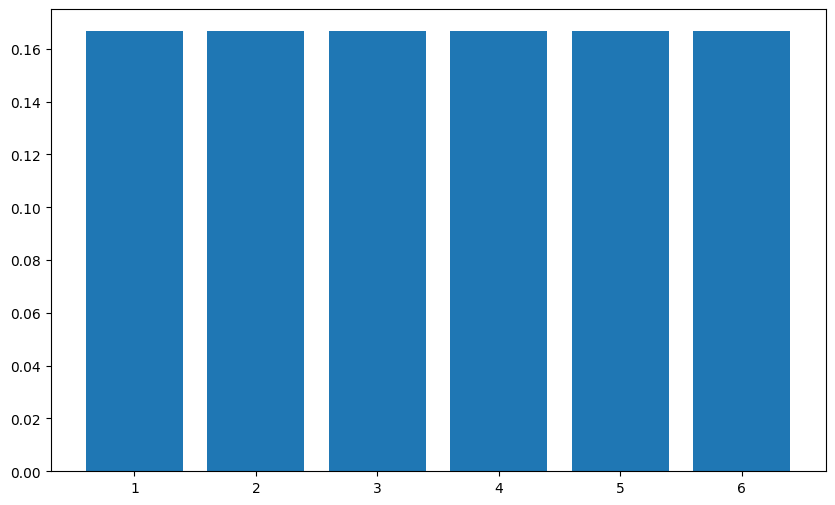

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(values, [1/6]*6) # since probability of each value is 1/6
plt.show()

PMF, P(X) - Based on empirical data (10000 rolls)

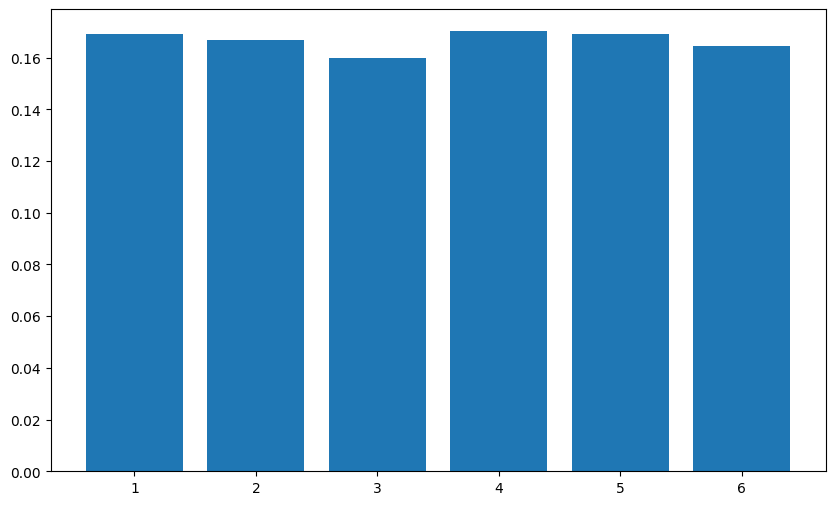

In [52]:
plt.figure(figsize=(10, 6))
plt.bar(values, probability)
plt.show()

In [45]:
1/6

0.16666666666666666

#### Task 2

Binomial distribution

In [58]:
def C(n, r):
    return math.factorial(n) / (math.factorial(r) * math.factorial(n-r))

Out of 6 questions, the probability of getting each correct is p=0.3

Random variable, X = number of questions correct.
Therefore the X has a binomial distribution, whose PMF is given by the following formula:

P(X=k) = 6Ck * p^k * (1-p)^(6-k)

In [59]:
def pmf(k):
    return C(6, k) * (0.3**k) * ((1-0.3)**(6-k))

1. probability of getting exactly three correct answers

In [60]:
pmf(3)

0.18521999999999994

2. probability of getting at least two correct answers

P[atleast two correct answers] = 1 - P[less than two correct answers]

less than two correct answers = P[0 correct] + P[1 correct] = pmf(0) + pmf(1)

In [68]:
1 - (pmf(0) + pmf(1))

0.5798250000000003

3. probability of getting at most two correct answers

at most two correct answers = P[0 correct] + P[1 correct] + P[2 correct] = pmf(0) + pmf(1) + pmf(2)

In [69]:
pmf(0) + pmf(1) + pmf(2)

0.7443099999999997

4. probability of getting less than five correct answers

P[less than five correct] = 1 - P[Five correct] - P[Six correct]

In [71]:
1 - pmf(5) - pmf(6)

0.989065

#### Task 3

Poisson Distribution

Poisson Random Variable, X = occurrence of anaphylaxis next year

lambda = 12 incidents/year



In [72]:
def poisson_pmf(k, _lambda=12):
    return (math.exp(-_lambda) * _lambda**k) / math.factorial(k)

a. Exactly three will experience anaphylaxis.

In [73]:
poisson_pmf(3)

0.0017695331577585243

b. At least two will experience anaphylaxis:

P[at least two anaphylaxis] = 1 - P[0] - P[1]

In [74]:
1 - poisson_pmf(0) - poisson_pmf(1)

0.9999201252394068

c. At most two-experience anaphylaxis

P[0] + P[1] + P[2]

In [75]:
poisson_pmf(0) + poisson_pmf(1) + poisson_pmf(2)

0.0005222580500328978

#### Task 4

Normal distribution

In [85]:
n = 500
mean = 160
std = 5

In [86]:
def z_score_normalizer(x, mu=mean, sigma=std):
    return (x - mu) / sigma

In [80]:
from scipy.stats import norm

a. What is the chance of height above 168 cm?

P[X > 168] = P[Z>z] = 1 - P[Z<=z] = cdf(z)

In [103]:
z = z_score_normalizer(168)
p_1 = float(1 - norm.cdf(z))
p_1

0.054799291699557995

b. What percentage of students will have height above 168 cm?

In [104]:
print(f"{p_1*100:.2f}%")

5.48%


c. How many of students will have height between 150 cm to 175cm?

P[150<X<175] = P[z1<Z<z2] = P[Z>z1] + P[Z<z2]

= 1 - P[Z<z1] + P[Z<z2] = cdf(z2) - cdf(z1)

In [105]:
z1 = z_score_normalizer(150)
z2 = z_score_normalizer(175)

p_2 = float(norm.cdf(z2) - norm.cdf(z1))

In [112]:
print(f"Number of students: {math.floor(p_2*500)}")

Number of students: 487


#### Task 5

##### Hypothesis Testing
Hypothesis testing is a statistical method that allows us to infer information about the population based on a sample of that population.
The process involves:

* Defining a Null Hypothesis ($H_0$), which provides an initial assumption or a claim about the population.
* Defining an Alternative Hypothesis ($H_1$) that contradicts the null hypothesis so that it can be rejected.
* Calculating the Test Statistic ($z$), which is the value calculated from sample data to make the decision.

The test statistic is a numerical summary of the dataset by reducing the sample into a single value. The test statistic depends on the type of test to be conducted such as z-test, t-test, chi-square test, etc.

**Calculating Test Statistic:**
The process of calculating the statistic varies by test type. For z-test, the statistic is calculated as follows:

$z = \frac{\bar{X} - \mu_0}{\sigma/\sqrt{n}}$

Where:

* $\bar{X}$ is the sample mean

* $\mu_0$ is the hypothesized population mean

* $\sigma$ is the population standard deviation

* $n$ is the sample size

After calculating the test statistic, we can make decisions about accepting or rejecting the null hypothesis in two ways:
1. **Critical Value Approach**: The critical value is the value for which the area under the density curve is equal to the significance level. This critical value is compared to the test statistic and the null hypothesis is either accepted or rejected.

2. **P-Value Approach:** The p-value is the probability of getting observed values, assuming the null hypothesis is true. It is calculated as the probability of getting a value less than or equal to the value of the test statistic, i.e., `p(z)`. 
The p-value will be `1-p(z)` or probability of getting values beyond the observed value z. The p-value approach uses the calculated probability to determine whether there is evidence to reject the null hypothesis. 
If the P-value is less than or equal to a pre-defined significance level (commonly 0.05), we reject the null hypothesis.

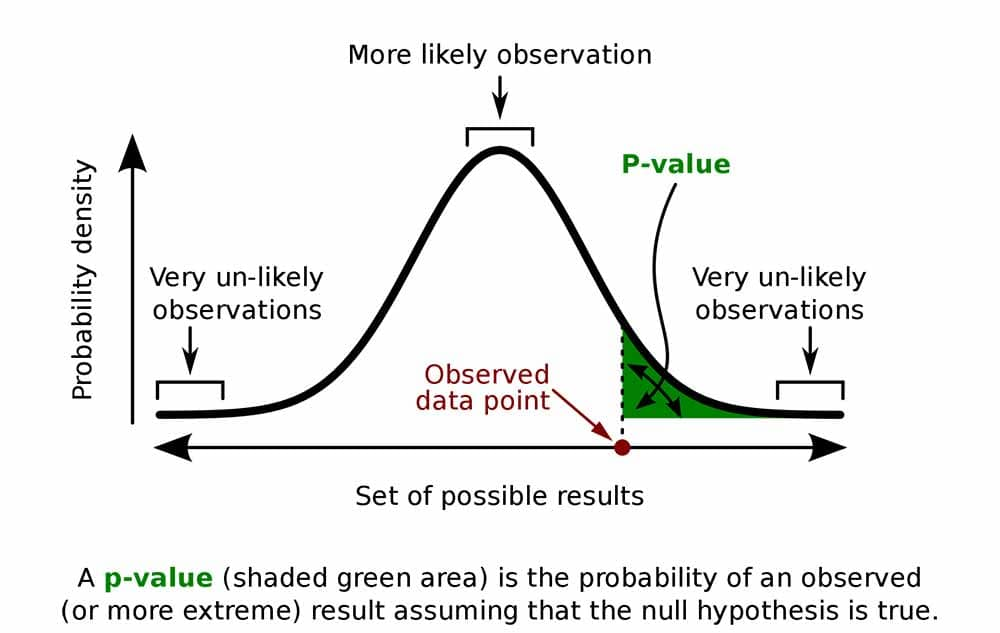

*p-value calculation*: The following steps are usually followed to calculate the p-value of the test statistic:
**Steps to Calculate P-Value**

1. **Calculate test statistic:** Compute z or t statistic using appropriate formula
2. **Determine test direction:** One-tailed or two-tailed test
3. **Find area under curve:** Use z-score tables to find probability
4. **Adjust for test direction:** For two-tailed tests, multiply one-tailed p-value by 2

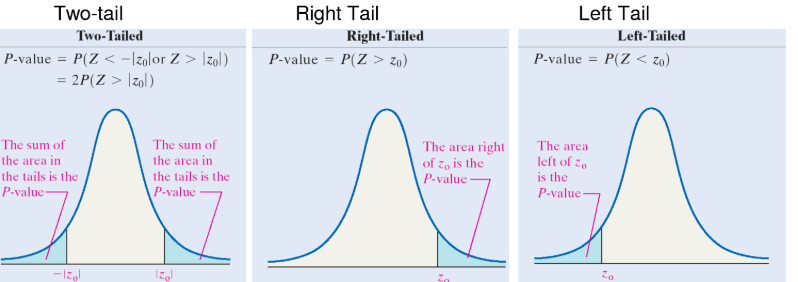

* For left-tailed, the p-value is P(Z < z) = f(z)
* For right-tailed, the p-value is P(Z > z) = 1 - f(z)
* For two-tailed, the p-value is P(|Z| > z) = 2*f(-z)

**Decision Rule:** Reject H₀ if p-value < α

<aside>
A small p-value (typically < 0.05) suggests strong evidence against the null hypothesis, indicating that the observed results are unlikely under H₀.

</aside>

**P-Value Interpretation**

- p < 0.01: Very strong evidence against H₀
- 0.01 ≤ p < 0.05: Strong evidence against H₀
- 0.05 ≤ p < 0.10: Weak evidence against H₀
- p ≥ 0.10: Little to no evidence against H₀

**Conclusion**: The p-value is not the probability that H₀ is true. It's the probability of observing such extreme data, assuming H₀ is true.